# Decision Tress

In [114]:
# trainig a DT on iris dataset
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.datasets import load_iris , make_moons
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from graphviz import Source
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# default code taken from book to enhance text and make figures better

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [115]:
X_iris = iris.data

In [51]:
iris = load_iris(as_frame=True)
X = iris.data
y=iris.target

In [52]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
tree_cl = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_cl.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [54]:
export_graphviz(
    tree_cl,
    out_file="Iris_Dt1.dot",
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

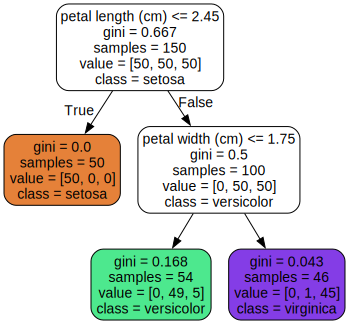

In [55]:
Source.from_file("Iris_Dt1.dot") 
# can also convert it into PNG and PDfs nice!!!!
# in the below example the left node at depth 1 is pure node as the instances all belong to same class that's why GINI =0

# Making Predictions

`One of qualities of DT are they require very little data preparation.....they don't require feature scaling or centering`

In [56]:
# implementing Gini Index eqn
def calc_GI(sample_in_node:int,
            k_class:int,
            values:list):
    sum = 0
    probs = [values[i]/sample_in_node for i in range(len(values))]
    for i in range((k_class)):
        sum+=probs[i]**2
        
    return 1-sum

In [57]:
# from above tree putting values of depth-2 left node 
calc_GI(sample_in_node=54,k_class=3,values=[0,49,5]).__round__(3)
# yep it's a match

0.168

`Sklearn uses CART algo which only gives Binary Tress. ID3 like other algos can produce multiple child nodes`

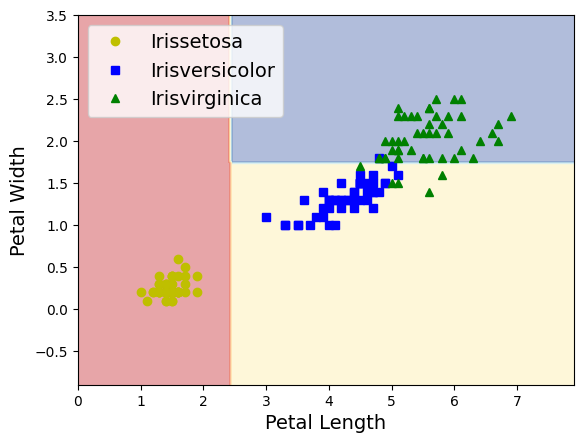

In [58]:
X_plot = iris.data[["petal length (cm)","petal width (cm)"]].values
tree_cl.fit(X_plot,y)
x_min , x_max = X_plot[:,0].min() -1 , X_plot[:,0].max() +1
y_min , y_max = X_plot[:,1].min()-1 , X_plot[:,1].max()+1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
z = tree_cl.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha=0.4,cmap=plt.cm.RdYlBu)
for idx , (name,style) in enumerate(zip(iris.target_names,("yo","bs","g^"))):  # this is to essentially add the data points 
    plt.plot(X_plot[:,0][y==idx],X_plot[:,1][y==idx],style,label=f"Iris{name}")
    
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

`The tree structure, including all the information shown in Figure 6-1, is available via the
classifier’s tree_ attribute. Type help(tree_clf.tree_) for details, and see the this chapter’s
notebook for an example.`

In [59]:
help(tree_cl.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For lea

# Estimating Class Probability

In [60]:
# for a flower whose petals are 5cm long and 1.5 cm wide
print(tree_cl.predict_proba([[5,1.5]]).round(3))
# match it with manual to get the sense of how this is happeninng 
''' So first it traverses to find the particular node with this insatnce... then it returns the ratios of training instances to class... so in this case the it went to depth-2 left node where the total instances were 54 and it returned us ratio of value[k] to total instances'''
value = [0,49,5]
for i in value:
    print( i/sum(value))

[[0.    0.907 0.093]]
0.0
0.9074074074074074
0.09259259259259259


# Entropy formula implementation

In [61]:
values=[0,49,5]
n = sum(values)
probs = [(i/n).__round__(3) for i in values]
entropy = sum([-(i *np.log2(i)) for i in probs if i !=0])

In [62]:
entropy.round(3)
# which is identical to the one given in book

0.446

# Testing regularization on the moons dataset

In [63]:
x_moons , y_moons = make_moons(n_samples=150,noise=0.2,random_state=42)

tree_cl1 = DecisionTreeClassifier(random_state=42)
tree_cl2 = DecisionTreeClassifier(random_state=42,min_samples_leaf=5) # regularised
tree_cl1.fit(x_moons,y_moons) 
tree_cl2.fit(x_moons,y_moons)


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [94]:
# making test data 
x_moons_test , y_moons_test = make_moons(n_samples=1000,noise=0.4,random_state=43)

tree_cl1.score(x_moons_test,y_moons_test) , tree_cl2.score(x_moons_test,y_moons_test)
# with noise less than 0.3 regularised is working better than simple..... experimenting further 

(0.841, 0.838)

In [92]:
tree_cl3 = DecisionTreeClassifier(random_state=42,max_depth=3,max_leaf_nodes=5,min_samples_split=6,criterion="gini")
tree_cl3.fit(x_moons,y_moons)
tree_cl3.score(x_moons_test,y_moons_test)
# this is fitting better than others... so more regularisation worked

0.864

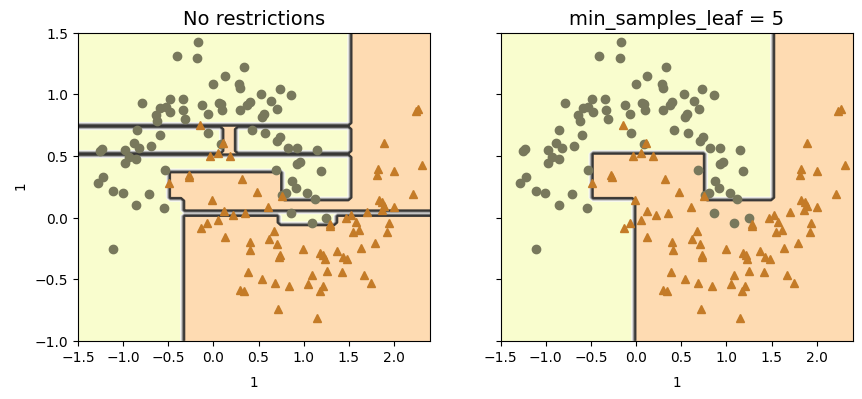

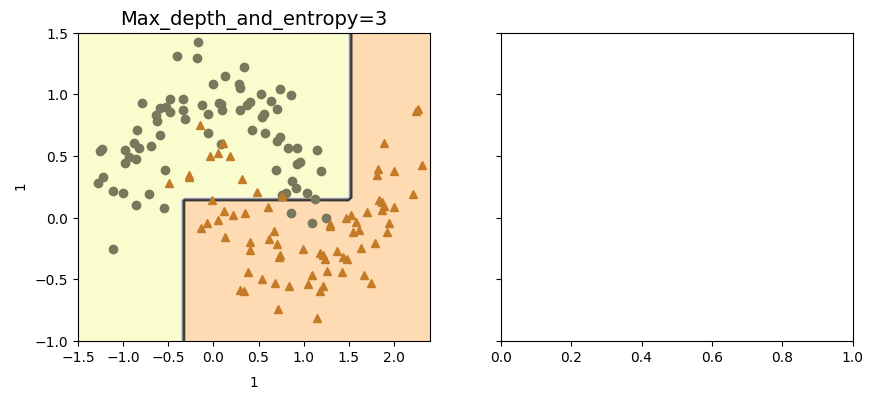

In [93]:
# plotting decision boundaries referencing book code 
def plot_decision_boundary(clf,X,y,axes,cmap):
    x1,x2=np.meshgrid(np.linspace(axes[0],axes[1],100),
                      np.linspace(axes[2],axes[3],100))
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=cmap)
    plt.contour(x1,x2,y_pred,cmap="Greys",alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
        
    plt.axis(axes)
    plt.xlabel(r"$_1$")
    plt.ylabel(r"$_1$")
    
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_cl1, x_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_cl2, x_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_cl2.min_samples_leaf}")
plt.ylabel("")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_cl3, x_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"Max_depth_and_entropy={tree_cl3.max_depth}")
plt.sca(axes[1])

   

`Man i need to learn to make these plots myselffffffffff`

# Regression 

In [105]:
np.random.seed(42)
X_quad = np.random.rand(200,1) -0.5
y_quad = X_quad**2 + 0.025*np.random.randn(200,1)


In [109]:
tree_reg = DecisionTreeRegressor(random_state=42,max_depth=2)
tree_reg.fit(X_quad,y_quad)
export_graphviz(
    tree_reg,
    out_file="Random_reg_Dt.dot",
    feature_names=["X_quad"],
    class_names=["y_quad"],
    rounded=True,
    filled=True
)


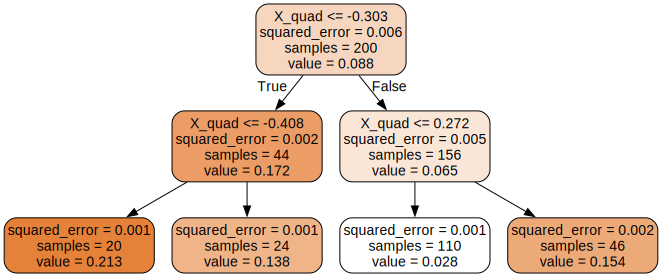

In [110]:
Source.from_file("Random_reg_Dt.dot")

In [113]:
tree_reg.predict([[0.2]]).round(3)

array([0.028])

# Sensitivity to Axis Orientation 

In [126]:
# making a pipeline that scales and rotates the dataset

pca_pipeline = make_pipeline(StandardScaler(),PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris[["petal length (cm)","petal width (cm)"]])
tree_cl_pca = DecisionTreeClassifier(random_state=42,max_depth=2)
tree_cl_pca.fit(X_iris_rotated,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

<Figure size 800x400 with 0 Axes>

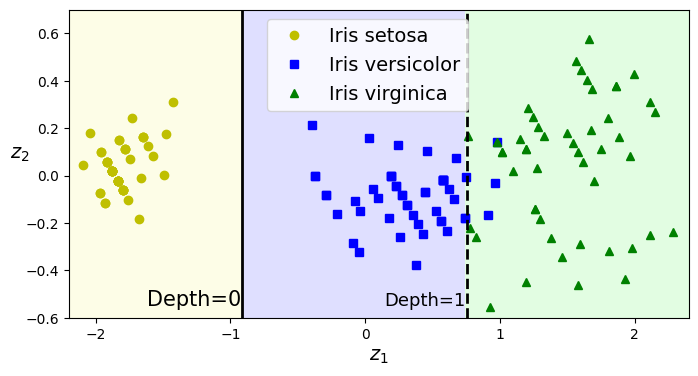

In [128]:
# extra code – this cell generates and saves Figure 6–8
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_cl_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y == idx],
             X_iris_rotated[:, 1][y == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_cl_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))


